<a href="https://colab.research.google.com/github/carolvieirav/Estatistica_Python/blob/main/Teste%20de%20Hip%C3%B3teses/(aula)Teste_Hip%C3%B3tese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import scale

from scipy import stats

In [14]:
bike_sharing_data = pd.read_csv('/content/day.csv')

In [15]:
bike_sharing_data.shape

(731, 16)

In [16]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
bike_sharing_data = bike_sharing_data[['season',
                                      'mnth',
                                       'holiday',
                                      'workingday',
                                      "weathersit",
                                      'temp',
                                      'cnt']]

In [8]:
bike_sharing_data.head()

,season,mnth,workingday,weathersit,temp,cnt
0,1,1,0,2,0.344167,985
1,1,1,0,2,0.363478,801
2,1,1,1,1,0.196364,1349
3,1,1,1,1,0.200000,1562
4,1,1,1,1,0.226957,1600


In [10]:
bike_sharing_data['season'].unique()

array([1, 2, 3, 4])

In [11]:
bike_sharing_data['workingday'].unique()

array([0, 1])

In [18]:
bike_sharing_data['holiday'].unique()

array([0, 1])

In [19]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3])

In [ ]:
bike_sharing_data['temp'].unique()

In [ ]:
bike_sharing_data['cnt'].unique()


In [22]:
bike_sharing_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


# P-valor

In [28]:
sample_01 = bike_sharing_data.query('workingday == 1')

In [31]:
sample_02 = bike_sharing_data.query('workingday == 0')

In [34]:
sample_01.shape, sample_02.shape

((231, 7), (231, 7))

In [33]:
sample_01 = sample_01.sample(231)

In [35]:
sample_01.mean()

season           2.536797
mnth             6.632035
holiday          0.000000
workingday       1.000000
weathersit       1.424242
temp             0.504098
cnt           4514.151515
dtype: float64

In [36]:
sample_01.mean()

season           2.536797
mnth             6.632035
holiday          0.000000
workingday       1.000000
weathersit       1.424242
temp             0.504098
cnt           4514.151515
dtype: float64

# T-teste

In [37]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=1.0150444082640335, pvalue=0.3106182425351329)

In [ ]:
# hipotese nula do teste de levene é
# H0: as variancias entre as amostras são iguais
# H1: as variancias entre as amostras são diferentes

In [40]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=4.7266310298768355, pvalue=0.030208140601652885)

In [41]:
diff =  scale(sample_01['cnt'] - sample_02['cnt'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


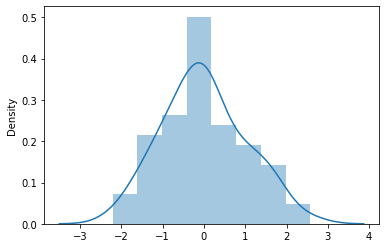

In [44]:
sns.distplot(diff)

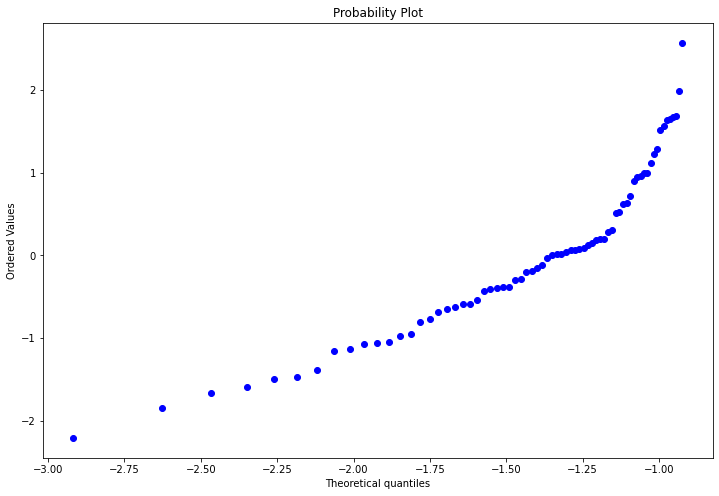

In [45]:
plt.figure(figsize=(12, 8))

stats.probplot(diff, plot=plt, dist='norm')

plt.show()